In [1]:
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
x, y= make_moons(n_samples=1000, noise=0.2)
x

array([[-0.78415969,  0.67081623],
       [ 0.93308926,  0.42440097],
       [ 0.68377037,  0.553093  ],
       ...,
       [-0.18872921,  0.96915977],
       [ 1.24058367,  0.63867035],
       [ 1.1562531 ,  0.01960494]])

In [4]:
ind=np.where(y==0)
x[ind,1][0]

array([ 0.67081623,  0.42440097,  0.553093  ,  0.74964745,  1.13889238,
        0.61394371,  0.61722952,  1.0190428 ,  1.04235393,  0.94527046,
        0.26784842,  0.42966249,  0.81110461,  0.69674135,  0.26296248,
        0.54258658,  1.15305848,  1.08689373, -0.04716102,  0.20864119,
        0.72677872,  0.55874668,  0.05199261,  0.81461378,  0.76136742,
        1.09272141,  1.18579996,  0.66998237,  0.62089563,  1.28001535,
        0.72586663,  0.78395077,  1.11117792,  0.4406331 ,  0.98747186,
        0.45925663,  0.47124923,  0.83045788,  0.22613224,  0.26886836,
        1.10565592,  0.33881089,  0.33625683,  0.25109048,  0.90217712,
        0.47913541,  0.51851357,  0.45525017,  0.72801159,  0.79082938,
        0.02229801,  0.96557395,  0.69856724,  1.36139844,  0.23890662,
        0.81038199,  0.52056569,  0.1929513 ,  0.7096769 ,  0.70151426,
        0.73277761,  0.97619287,  0.87783149,  0.3047245 ,  0.39786124,
        0.79993809,  1.0450386 ,  1.16693493,  0.50357425,  0.45

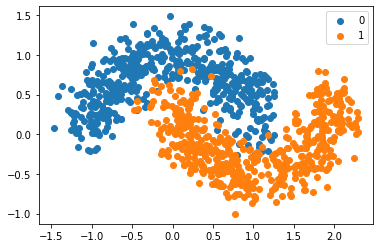

In [5]:
# x[np.where(y==0),0]
for i in range(2):
    ind=np.where(y==i)
    plt.scatter(x[ind,0][0], x[ind,1][0], label=str(i))
    plt.legend()

In [6]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y= train_test_split(x, y)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((750, 2), (250, 2), (750,), (250,))

In [7]:
model= Sequential()
model.add(Dense(500, activation="relu", input_dim=2))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer="adam", loss="mse", metrics='accuracy')

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               1500      
                                                                 
 dense_1 (Dense)             (None, 1)                 501       
                                                                 
Total params: 2,001
Trainable params: 2,001
Non-trainable params: 0
_________________________________________________________________


In [9]:
history= model.fit(train_x, train_y, verbose=0, epochs=1000, validation_data=(test_x, test_y))

In [10]:
key=history.history.keys()
for i in key:
    print(i,history.history[i][-1])

loss 0.019276106730103493
accuracy 0.9760000109672546
val_loss 0.020299464464187622
val_accuracy 0.972000002861023


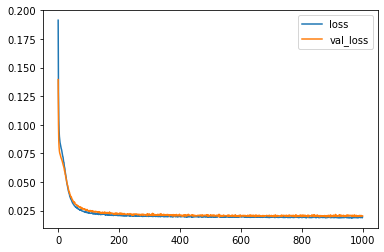

In [11]:
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.legend()

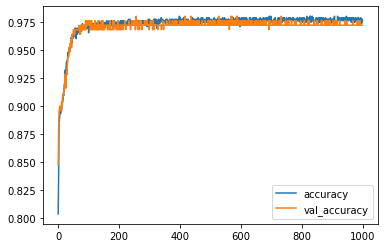

In [12]:
plt.plot(history.history['accuracy'], label="accuracy")
plt.plot(history.history['val_accuracy'], label="val_accuracy")
plt.legend()

 # adding dropout

In [13]:
model= Sequential()
model.add(Dense(500, activation="relu", input_dim=2))
model.add(Dropout(0.5))
model.add(Dense(300, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer="adam", loss="mse", metrics='accuracy')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 500)               1500      
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               150300    
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 301       
                                                                 
Total params: 152,101
Trainable params: 152,101
Non-trainable params: 0
_________________________________________________________________


In [14]:
history= model.fit(train_x, train_y, verbose=0, epochs=1000, validation_data=(test_x, test_y))
key=history.history.keys()
for i in key:
    print(i,history.history[i][-1])

loss 0.013035294599831104
accuracy 0.984000027179718
val_loss 0.021151000633835793
val_accuracy 0.972000002861023


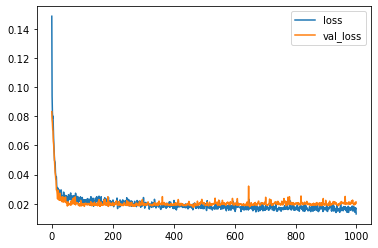

In [15]:
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.legend()

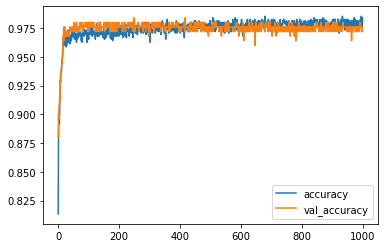

In [16]:
plt.plot(history.history['accuracy'], label="accuracy")
plt.plot(history.history['val_accuracy'], label="val_accuracy")
plt.legend()

#  Early stopping

In [17]:
from keras.callbacks import EarlyStopping

In [18]:
model= Sequential()
model.add(Dense(500, activation="relu", input_dim=2))

model.add(Dense(300, activation="relu"))

model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer="adam", loss="mse", metrics='accuracy')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 500)               1500      
                                                                 
 dense_6 (Dense)             (None, 300)               150300    
                                                                 
 dense_7 (Dense)             (None, 1)                 301       
                                                                 
Total params: 152,101
Trainable params: 152,101
Non-trainable params: 0
_________________________________________________________________


In [19]:
es=EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=100)
history= model.fit(train_x, train_y, verbose=0, epochs=1000,callbacks=es, validation_data=(test_x, test_y))
key=history.history.keys()
for i in key:
    print(i,history.history[i][-1])

Epoch 396: early stopping
loss 0.01656460203230381
accuracy 0.981333315372467
val_loss 0.02053394913673401
val_accuracy 0.9800000190734863


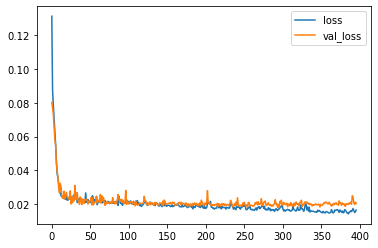

In [20]:
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.legend()

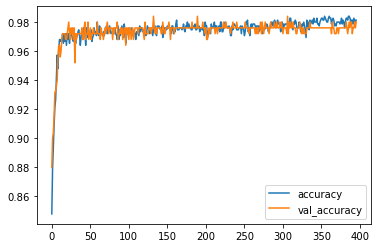

In [21]:
plt.plot(history.history['accuracy'], label="accuracy")
plt.plot(history.history['val_accuracy'], label="val_accuracy")
plt.legend()

# Kernal initilizer

In [22]:
from tensorflow.keras import regularizers
model= Sequential()
model.add(Dense(500, activation="relu", kernel_regularizer=regularizers.l2(0.01) ,input_dim=2))

model.add(Dense(300, activation="relu", kernel_regularizer=regularizers.l2(0.01)))

model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer="adam", loss="mse", metrics='accuracy')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 500)               1500      
                                                                 
 dense_9 (Dense)             (None, 300)               150300    
                                                                 
 dense_10 (Dense)            (None, 1)                 301       
                                                                 
Total params: 152,101
Trainable params: 152,101
Non-trainable params: 0
_________________________________________________________________


In [23]:
history= model.fit(train_x, train_y, verbose=0, epochs=1000, validation_data=(test_x, test_y))
key=history.history.keys()
for i in key:
    print(i,history.history[i][-1])

loss 0.04145320504903793
accuracy 0.9706666469573975
val_loss 0.04062175005674362
val_accuracy 0.9760000109672546


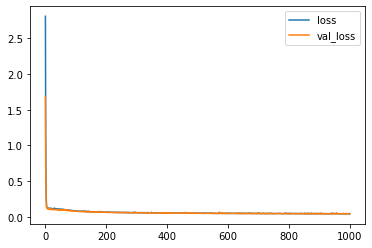

In [24]:
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.legend()

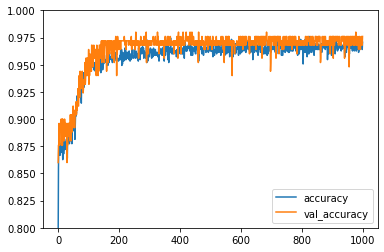

In [25]:
plt.plot(history.history['accuracy'], label="accuracy")
plt.plot(history.history['val_accuracy'], label="val_accuracy")
plt.ylim(0.8,1.0)
plt.legend()